<a href="https://colab.research.google.com/github/JD12321/Uni_Study/blob/main/2%ED%95%99%EB%85%84_2%ED%95%99%EA%B8%B0/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9D%91%EC%9A%A9_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/3%EC%A3%BC%EC%B0%A8/%EC%88%98_%EB%8F%99%EC%96%91%EB%AF%B8%EB%9E%98%EB%8C%80_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4_20231575_%EC%9D%80%EC%A7%80%EB%8B%B4_3%EC%A3%BC%EC%B0%A8%20%EA%B3%BC%EC%A0%9C_KNN(New%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN(K-Nearest Neighbors)


## import library & read csv data

In [63]:
# library & data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

dataset = pd.read_csv('/content/sample_data/Data_all/Iris.csv')

## search of data

In [64]:
# training과 test dataset 분리 (슬라이싱 값 수정)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 5].values

print(X.shape, y.shape)

(150, 4) (150,)


## find best test_dataset : 5% ~ 40%

test_size=0.05, 평균 정확도=0.9640
test_size=0.1, 평균 정확도=0.9627
test_size=0.15, 평균 정확도=0.9626
test_size=0.2, 평균 정확도=0.9625
test_size=0.25, 평균 정확도=0.9622
test_size=0.3, 평균 정확도=0.9613
test_size=0.35, 평균 정확도=0.9597
test_size=0.4, 평균 정확도=0.9574


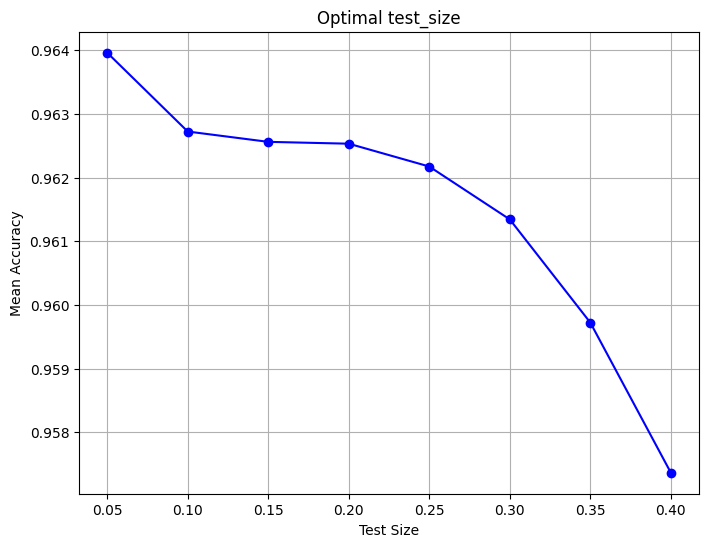

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


# test_size 범위 설정
start = 0.05
end = 0.4
step = 0.05
test_sizes = [round(i, 2) for i in np.arange(start, end + step, step)]
all_accuracy = []  # 각 test_size에 대한 평균 정확도 저장 리스트

# 최적의 test_size 찾기
for test_size in test_sizes:
    temp_accuracy = []  # 각 test_size에 대한 정확도 저장
    for i in range(30000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        # StandardScaler --> MinMaxScaler
        s = MinMaxScaler()  # 특성 스케일링, 최소값이 0, 최대값이 1이 되도록 변환
        X_train = s.fit_transform(X_train)
        X_test = s.transform(X_test)

        # KNN 모델 생성
        knn = KNeighborsClassifier(n_neighbors=13)  # k=13 지정 ((활용) 코드에서 정확도가 가장 높았던 k값)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # 정확도 계산
        accuracy = metrics.accuracy_score(y_test, y_pred)
        temp_accuracy.append(accuracy)

    # 해당 test_size의 평균 정확도 계산
    mean_accuracy = np.mean(temp_accuracy)
    all_accuracy.append(mean_accuracy)
    print(f"test_size={test_size}, 평균 정확도={mean_accuracy:.4f}")

# 최적의 tset_size를 찾기 위한 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(test_sizes, all_accuracy, marker='o', linestyle='-', color='b')
plt.title('Optimal test_size')
plt.xlabel('Test Size')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

# **선정 기준**
- test_size 비율이 큰데도 정확도가 높게 나온다면, 비율이 작을 때 보다 더 많은 데이터를 통한 검증을 한 것이기 때문에 신뢰성이 더 높다고 판단함.

- 그렇기에 비율이 크면서도 정확도가 높은 경우 최적의 값이 됨.

# **최적의 값**
## [test_size]=0.2, [평균 정확도]=0.9625

---

# **GridSearchCV로 베스트 k값 찾기**

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # test_size=0.2 (위에서 선정한 최적의 test_size)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 최적의 k값을 찾기 위한 k값 범위 설정
param_grid = {
    'n_neighbors': np.arange(1, 50)
}

# 최적의 k값 찾기
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 k값 출력
best_params = grid_search.best_params_
print(f"최적의 하이퍼파라미터: {best_params}")

# 최종 정확도 출력
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"최종 정확도: {accuracy:.4f}")

최적의 하이퍼파라미터: {'n_neighbors': 11}
최종 정확도: 0.9667
